In [2]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')


style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [3]:
stockFile = 'data/T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])
stock.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,0,6.548
2000-01-04,6.530,6.548,6.485,6.485,0,6.485
2000-01-05,6.521,6.599,6.508,6.599,0,6.599
2000-01-06,6.558,6.585,6.540,6.549,0,6.549
2000-01-07,6.545,6.595,6.504,6.504,0,6.504
2000-01-10,6.540,6.567,6.536,6.558,0,6.558
2000-01-11,6.600,6.664,6.595,6.664,0,6.664
2000-01-12,6.659,6.696,6.645,6.696,0,6.696
2000-01-13,6.664,6.705,6.618,6.618,0,6.618


重采样

In [4]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']

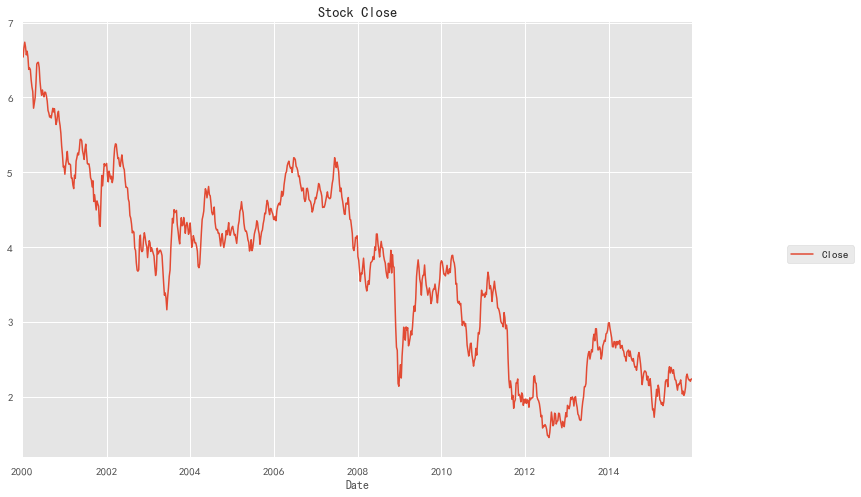

In [5]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

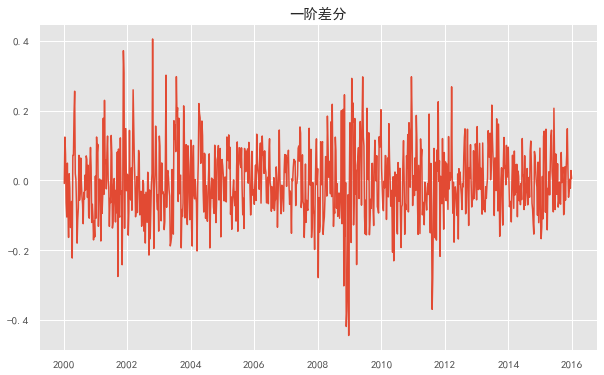

In [9]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure(figsize=(10,6))
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

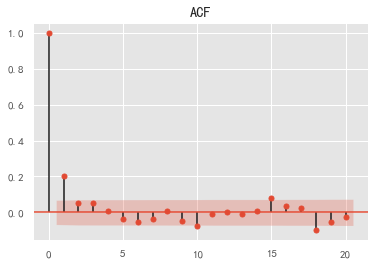

In [10]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

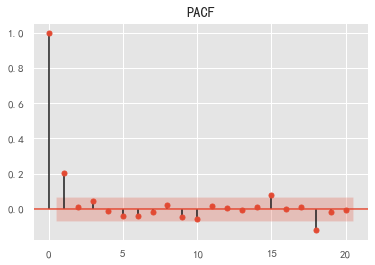

In [11]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [20]:
model = ARIMA(stock_train, order=(1, 1, 1),freq='W-MON')

In [21]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  834
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 720.846
Method:                       css-mle   S.D. of innovations              0.102
Date:                Sun, 15 Sep 2019   AIC                          -1433.692
Time:                        15:21:20   BIC                          -1414.787
Sample:                    01-10-2000   HQIC                         -1426.444
                         - 12-28-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0052      0.005     -1.145      0.252      -0.014       0.004
ar.L1.D.Close     0.2841      0.203      1.397      0.163      -0.115       0.683
ma.L1.D.Close    -0.0869      0.213     -0.408      0.683      -0.504       0.330
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5199           +0.0000j            3.5199            0.0000
MA.1           11.5086           +0.0000j           11.5086            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
pred = result.predict('20140609', '20160701',dynamic=True, typ='levels')
pred

In [ ]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)